# Import necessary library

In [1]:
#basic libraries like numpy, pandas, matplotlib and seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#for file handling and time
import os
import time

#for preprocesing like spliting the data and lable encoding
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#for model building 
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator

#for accuracy metrics
from sklearn.metrics import mean_squared_log_error

%matplotlib inline

# First of all read or load the data 

In [2]:
os.getcwd()

'/kaggle/working'

In [3]:
df=pd.read_csv('../input/hackerearth-carnival-wars-challenge/train.csv',index_col='Product_id')

## checking data info

In [4]:
df.insert(1,'Date',pd.to_datetime(df['instock_date']).dt.date,allow_duplicates=True)
df=df.drop(['instock_date'],axis=1)

In [5]:
df.shape

(6368, 14)

In [6]:
df[0:10]

,Stall_no,Date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
Product_id,,,,,,,,,,,,,,
BRAE2NF6JA5GUEXG,37.0,2015-08-22,2,Lillyann,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
TUNE8SFB6RJN2HSD,38.0,2016-03-27,24,Klynn,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256
BRAEAR7WZPQGPBZU,9.0,2015-08-18,447,Ridge,Yes,Child_care,0,10,0.0,250.0,9.0,5752.0,7309.0,6785.701362
WATDZ2ZQ8JPDHCTJ,50.0,2016-03-28,23,Abran,Yes,Educational,2,48,0.0,144.0,13.0,5090.0,20814.0,13028.917824
JWSEBUKYQPMBZ3RK,7.0,2016-03-29,63,Dustyn,Yes,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935
SHIECAYW3VZWGZGX,23.0,2015-09-25,162,Brilee,No,Technology,1,49,0.0,633.0,6.0,3959.0,6104.0,5631.247872
SHOE4FZGGTE7HJXN,33.0,2014-12-08,462,Zoe,No,Cosmetics,3,57,0.0,263.0,13.0,2006.0,5257.0,3874.264992
SHOE6QGAYFFMBWG6,4.0,2015-09-22,23,Koby,Yes,Educational,1,67,0.0,104.0,15.0,3596.0,5921.0,4820.943600
KRTEBSMKCGFESHYX,26.0,2016-03-28,156,Tiffani,Yes,Child_care,0,53,0.0,310.0,6.0,6965.0,10194.0,8837.724240


In [7]:
df['Discount_avail'].value_counts()

0.0    5441
1.0     889
Name: Discount_avail, dtype: int64

In [8]:
df.loc[df['Stall_no'] == 20.0]['Product_Category'].value_counts()

Repair         20
Child_care     19
Pet_care       19
Home_decor     18
Fashion        18
Cosmetics      17
Technology     17
Hospitality    15
Organic        11
Educational    11
Name: Product_Category, dtype: int64

In [9]:
max(df.loc[(df['Stall_no'] == 20.0) & (df['Product_Category'] == 'Repair')]['Selling_Price'])

10833.101568

In [10]:
df.loc[df['Product_Category'].isin(['Repair'])]

,Stall_no,Date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
Product_id,,,,,,,,,,,,,,
JWSEBUKYQPMBZ3RK,7.0,2016-03-29,63,Dustyn,Yes,Repair,1,35,1.0,211.0,4.0,2430.0,9261.0,906.553935
SUDEGGB5GCHTY53K,1.0,2016-03-29,268,Juliano,Yes,Repair,2,22,0.0,274.0,1.0,3256.0,6033.0,4906.662600
NKCECHHZSUD4KNZF,40.0,2015-09-26,198,Zahraa,Yes,Repair,0,93,0.0,215.0,7.0,3165.0,4178.0,3833.067392
BRAE8TFHWYCTDUM3,17.0,2015-08-19,101,Roslyn,No,Repair,0,19,0.0,NaN,9.0,950.0,1580.0,1563.983586
ACCE6DZC4SANU636,29.0,2015-08-17,423,Otis,No,Repair,0,12,0.0,280.0,8.0,4843.0,8913.0,7162.783650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NKCE6WKBNBGFYKPW,25.0,2015-11-21,90,Oshea,Yes,Repair,0,71,0.0,216.0,3.0,683.0,1023.0,1058.567400
ACCEGKXQ2AQQ2AQV,18.0,2016-02-26,452,Quetzalli,No,Repair,0,46,1.0,205.0,8.0,4345.0,6564.0,844.141694
SWSEBHCP5YSCUU2S,13.0,2015-05-06,358,Adelaide,No,Repair,3,50,0.0,266.0,3.0,3205.0,14174.0,8900.778096


# Now let's do some EDA on dataset

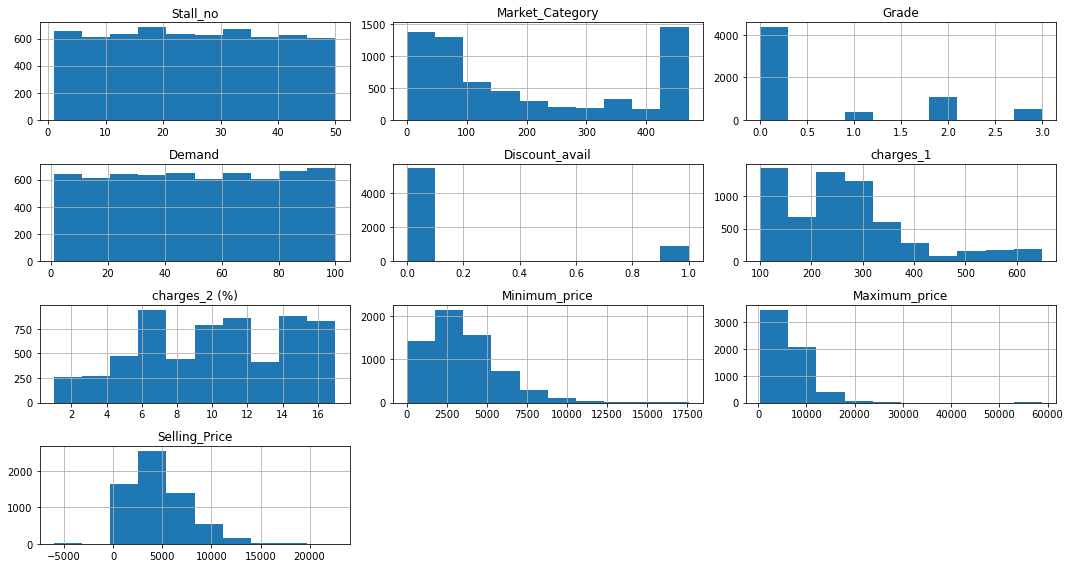

In [11]:
_=df.hist(figsize=(15,8))
plt.tight_layout()

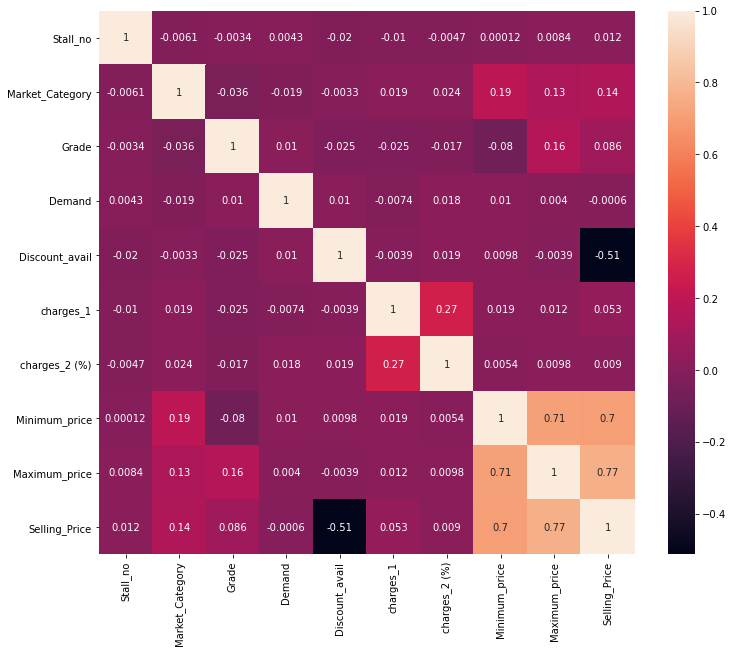

In [12]:
fig = plt.figure(figsize = (12,10))
sns.heatmap(df.corr(), annot = True)

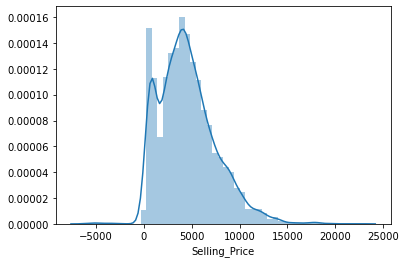

In [13]:
sns.distplot(df.Selling_Price)

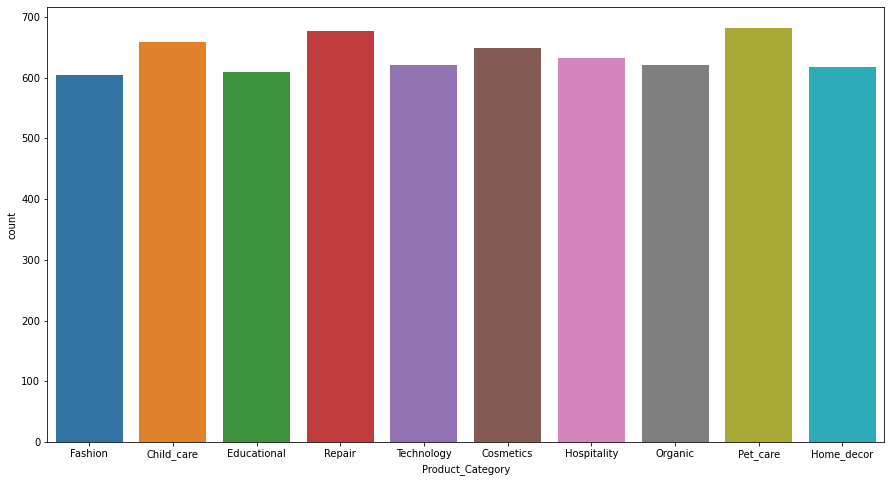

In [14]:
plt.figure(figsize=(15,8))
_=sns.countplot(x='Product_Category',data=df)

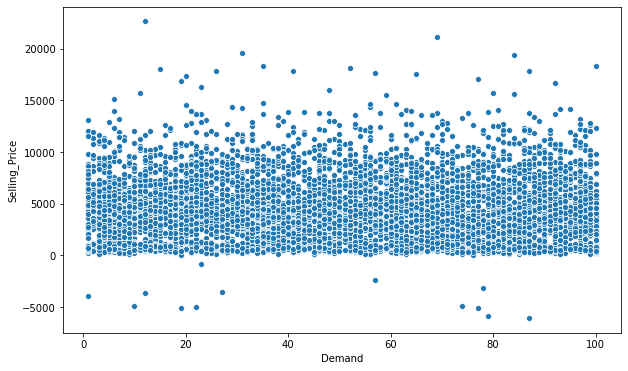

In [15]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Demand',y='Selling_Price',data=df)

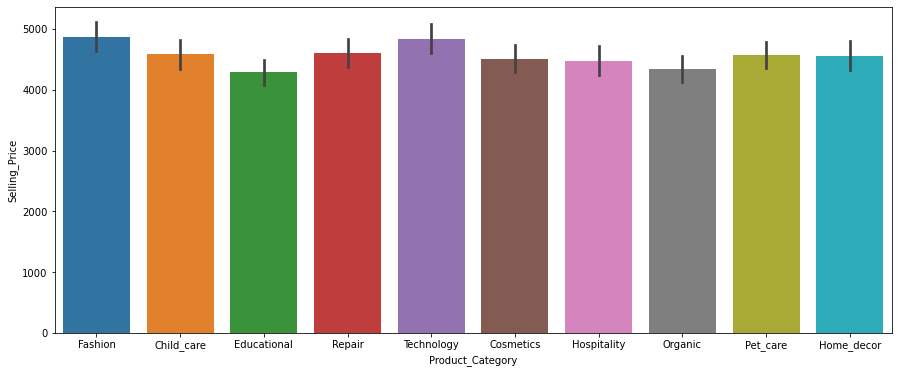

In [16]:
plt.figure(figsize=(15,6))
sns.barplot(x='Product_Category',y='Selling_Price',data=df)

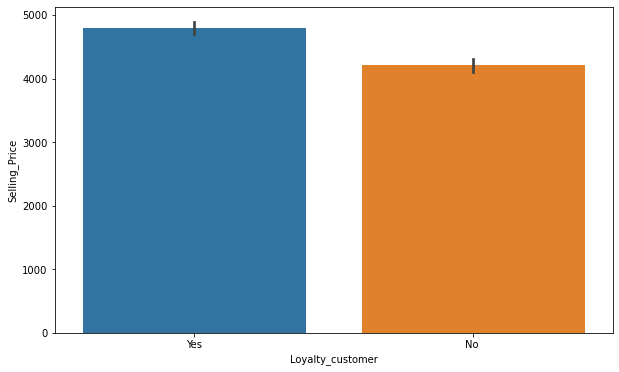

In [17]:
plt.figure(figsize=(10,6))
sns.barplot(x='Loyalty_customer',y='Selling_Price',data=df)

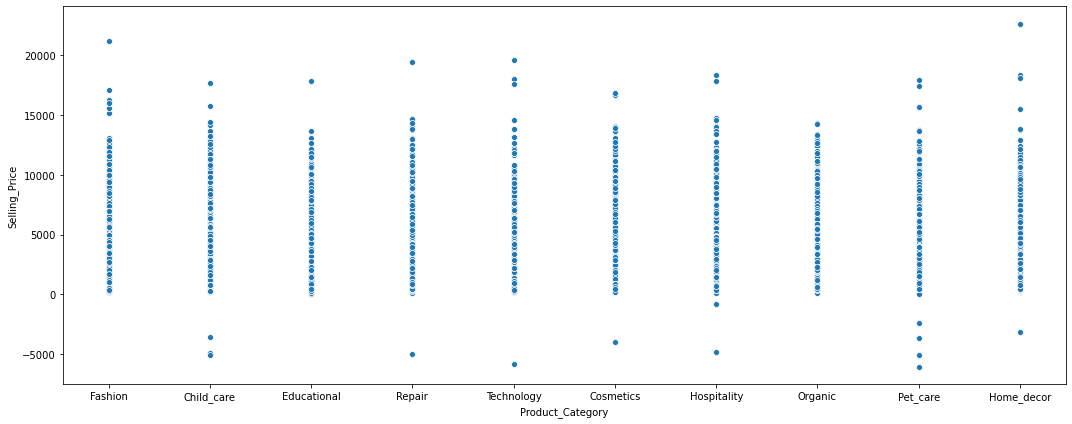

In [18]:
x=df['Product_Category']
y=df['Selling_Price']
plt.figure(figsize=(15,6)),
sns.scatterplot(x=x,y=y)
plt.tight_layout()

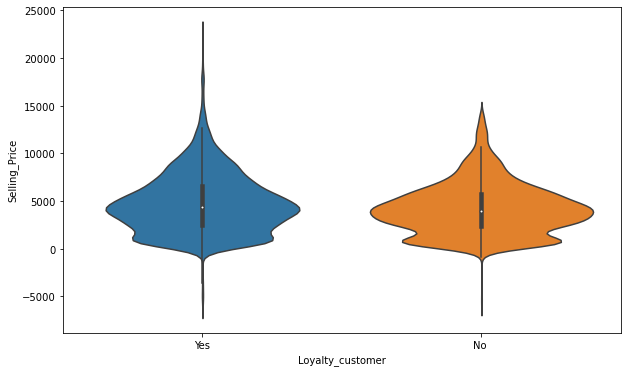

In [19]:
plt.figure(figsize=(10,6))
sns.violinplot(x='Loyalty_customer', y='Selling_Price', data=df)

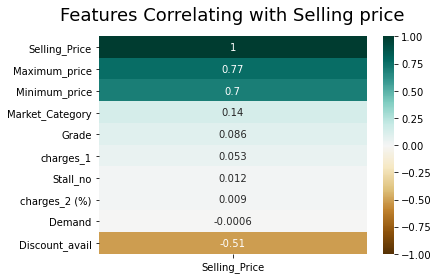

In [20]:
heatmap = sns.heatmap(df.corr()[['Selling_Price']].sort_values(by='Selling_Price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Selling price', fontdict={'fontsize':18}, pad=16);

# Now let's do some preprocesing

In [21]:
threshold = 0.7
#Dropping columns with missing value rate higher than threshold
df = df[df.columns[df.isnull().mean() < threshold]]

#Dropping rows with missing value rate higher than threshold
df = df.loc[df.isnull().mean(axis=1) < threshold]

In [22]:
df = df[df.Selling_Price >= 0]
df = df[df['Maximum_price'].notna()]
df = df[df['Stall_no'].notna()]
df = df[df['Discount_avail'].notna()]
df = df[df['charges_1'].notna()]
df = df[df['charges_2 (%)'].notna()]

In [23]:
df['Minimum_price']=df['Minimum_price'].fillna(df['Minimum_price'].mean()).astype(int)
df['Diff'] = df['Maximum_price'] - df['Minimum_price']
df['Total'] = df['Maximum_price'] + df['Minimum_price']
df['Average_price'] = (df['Maximum_price'] + df['Minimum_price'])/2
df['Max_Min_ratio'] = df['Maximum_price'] / df['Minimum_price']
df['Max_Min_mul'] = df['Maximum_price'] * df['Minimum_price']

In [24]:
df=df.drop(['Customer_name','Date'],axis=1)

In [25]:
df.isnull().sum().sort_values(ascending=False)

Max_Min_mul         0
charges_1           0
Market_Category     0
Loyalty_customer    0
Product_Category    0
Grade               0
Demand              0
Discount_avail      0
charges_2 (%)       0
Max_Min_ratio       0
Minimum_price       0
Maximum_price       0
Selling_Price       0
Diff                0
Total               0
Average_price       0
Stall_no            0
dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5588 entries, BRAE2NF6JA5GUEXG to CAGE53FSAFWZRHFF
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Stall_no          5588 non-null   float64
 1   Market_Category   5588 non-null   int64  
 2   Loyalty_customer  5588 non-null   object 
 3   Product_Category  5588 non-null   object 
 4   Grade             5588 non-null   int64  
 5   Demand            5588 non-null   int64  
 6   Discount_avail    5588 non-null   float64
 7   charges_1         5588 non-null   float64
 8   charges_2 (%)     5588 non-null   float64
 9   Minimum_price     5588 non-null   int64  
 10  Maximum_price     5588 non-null   float64
 11  Selling_Price     5588 non-null   float64
 12  Diff              5588 non-null   float64
 13  Total             5588 non-null   float64
 14  Average_price     5588 non-null   float64
 15  Max_Min_ratio     5588 non-null   float64
 16  Max_Min_mul       55

## Lable Encoding

In [27]:
lbl_enc = LabelEncoder()
df['Loyalty_customer'] = lbl_enc.fit_transform(df['Loyalty_customer']).astype(int)
df['Product_Category'] = lbl_enc.fit_transform(df['Product_Category']).astype(int)

# Now spliting the data and fitting the model

In [28]:
x=df.drop(['Selling_Price'],axis=1)
y=df['Selling_Price']

x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.20,random_state=42)

## Model 1 : ExtraTreeREgressor

In [29]:

etr=ExtraTreesRegressor(n_estimators= 1700,random_state = 1, max_depth = 15,verbose = 1)
etr.fit(x_train,y_train)
y_pred=(etr.predict(x_val))
score = max(0,100-np.sqrt(mean_squared_log_error(y_val, y_pred )))
score

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1700 out of 1700 | elapsed:   25.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1700 out of 1700 | elapsed:    0.6s finished


99.98184424340356

## Model 2 : StakingEstimator with ExtraTreeRegressor

In [30]:

exported_pipeline = make_pipeline(StackingEstimator(ExtraTreesRegressor(n_estimators= 1700,random_state = 1, max_depth = 15,verbose = 1)),
                                                ExtraTreesRegressor(n_estimators= 1700,random_state = 1, max_depth = 15,verbose = 1))
exported_pipeline.fit(x,y)
y_pred=(exported_pipeline.predict(x_val))
score = max(0,100-np.sqrt(mean_squared_log_error( y_val, y_pred )))
print(score)

%time

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1700 out of 1700 | elapsed:   30.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1700 out of 1700 | elapsed:    2.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1700 out of 1700 | elapsed:   32.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1700 out of 1700 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


99.99937346662286


[Parallel(n_jobs=1)]: Done 1700 out of 1700 | elapsed:    0.7s finished
UsageError: Line magic function `%%time` not found.


# Now do the preprocecing on test dataset to make it compatible for model

In [ ]:
dft=pd.read_csv('../input/hackerearth-carnival-wars-challenge/test.csv',index_col='Product_id')
dft.isnull().sum().sort_values(ascending=False)
dft=dft.drop(['instock_date','Customer_name'],axis=1)

In [ ]:
dft['charges_2 (%)']=dft['charges_2 (%)'].fillna(dft['charges_2 (%)'].mean()).astype(int)
dft['charges_1']=dft['charges_1'].fillna(dft['charges_1'].mean()).astype(int)
dft['Minimum_price']=dft['Minimum_price'].fillna(dft['Minimum_price'].mean()).astype(int)
dft['Stall_no']=dft['Stall_no'].fillna(dft['Stall_no'].mean()).astype(int)

lbl_enc = LabelEncoder()
dft['Loyalty_customer'] = lbl_enc.fit_transform(dft['Loyalty_customer']).astype(int)
dft['Product_Category'] = lbl_enc.fit_transform(dft['Product_Category']).astype(int)

In [ ]:

dft['Diff'] = dft['Maximum_price'] - dft['Minimum_price']
dft['Total'] = dft['Maximum_price'] + dft['Minimum_price']
dft['Average_price'] = (dft['Maximum_price'] + dft['Minimum_price'])/2
dft['Max_Min_ratio'] = dft['Maximum_price'] / dft['Minimum_price']
dft['Max_Min_mul'] = dft['Maximum_price'] * dft['Minimum_price']

# prediction for test dataset

In [ ]:
Sales_price=exported_pipeline.predict(dft)

# make dataset for submition

In [ ]:
dft.insert(11,'Selling_Price',Sales_price,allow_duplicates=True)

In [ ]:
a=dft['Selling_Price']
a[0:20]

In [ ]:
a.to_csv('./Finalsubmition.csv')